In [70]:
!pip3 install --upgrade pip

In [72]:
!pip3 install seaborn --upgrade pip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 4.5 MB/s eta 0:00:00a 0:00:01


In [139]:
!pip3 install scikit-learn --upgrade pip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 20.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 19.2 MB/s eta 0:00:00


In [4]:
import pandas as pd
import numpy as np
import pandas as pd
import re

In [158]:
caminho_arquivo = '/Users/victorcasi/Documents/data/train-data.csv'


In [159]:
dados_teste = pd.read_csv(caminho_arquivo, sep=';')
dados_teste

,index,id_product,Region,Country,Site,Operations,Zone,Cluster,Reference proxy,Product Line proxy,Division proxy,Customer Persona proxy,Strategic Product Family proxy,Product Life cycel status,Date,Month 1,Month 2,Month 3,Month 4
0,645874,156160,EUROPE,DE,NL_DC_Venray,Europe Operations,DACH,Germany,reference-13523,Product Line-4,Division-3,Customer Segmentation-3,Strategic Product Family-12,NaN,may-aug 2021,0,0,0,0
1,469488,224631,CHINA,CN,CN_DC_Shanghai,China Operations,China & HK,China,reference-12778,Product Line-4,Division-3,Customer Segmentation-14,Strategic Product Family-9,NaN,jan-apr 2021,0,1,0,0
2,348904,104047,EUROPE,GB,NL_DC_HLD,Europe Operations,UK and Ireland,United Kingdom,reference-3513,Product Line-3,Division-2,Customer Segmentation-23,Strategic Product Family-7,NaN,jan-apr 2021,0,2,0,0
3,1725822,11823,EAJP,AU,AU_DC_Perth,International Operations,Pacific,Australia,reference-672,Product Line-1,Division-1,Customer Segmentation-11,Strategic Product Family-3,NaN,jan-apr 2023,0,0,0,0
4,404781,159924,EUROPE,ES,NL_DC_HLD,Europe Operations,Iberia,Spain,reference-3496,Product Line-3,Division-2,Customer Segmentation-14,Strategic Product Family-7,NaN,jan-apr 2021,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3173341,1285020,60735,NAM,US,US_DC_Mechanicsburg,North America Operations,US,USA,reference-6024,Product Line-4,Division-3,Customer Segmentation-4,Strategic Product Family-12,EOL,may-aug 2022,0,0,0,0
3173342,1527076,57934,NAM,US,US_DC_Athens,North America Operations,US,USA,reference-5672,Product Line-4,Division-3,Customer Segmentation-43,Strategic Product Family-9,NaN,sep-dec 2022,0,0,0,0
3173343,306473,61616,NAM,US,US_DC_Mechanicsburg,North America Operations,US,USA,reference-6241,Product Line-4,Division-3,Customer Segmentation-46,Strategic Product Family-12,NaN,jan-apr 2021,0,0,0,0
3173344,205624,205624,EUROPE,FR,FR_DC_Evreux,France Operations,France,France,reference-11174,Product Line-4,Division-3,Customer Segmentation-1,Strategic Product Family-9,NaN,sep-dec 2020,0,1,0,0


In [216]:
df = dados_teste
grouped= df.groupby(['Operations', 'Date'])['Month 1','Month 2','Month 3','Month 4'].nunique().reset_index()
grouped

ValueError: Cannot subset columns with a tuple with more than one element. Use a list instead.

In [163]:
dados_teste['Data_Substr'] = dados_teste['Date'].str[8:12]
dados_teste

,index,id_product,Region,Country,Site,Operations,Zone,Cluster,Reference proxy,Product Line proxy,Division proxy,Customer Persona proxy,Strategic Product Family proxy,Product Life cycel status,Date,Month 1,Month 2,Month 3,Month 4,Data_Substr
0,645874,156160,EUROPE,DE,NL_DC_Venray,Europe Operations,DACH,Germany,reference-13523,Product Line-4,Division-3,Customer Segmentation-3,Strategic Product Family-12,NaN,may-aug 2021,0,0,0,0,2021
1,469488,224631,CHINA,CN,CN_DC_Shanghai,China Operations,China & HK,China,reference-12778,Product Line-4,Division-3,Customer Segmentation-14,Strategic Product Family-9,NaN,jan-apr 2021,0,1,0,0,2021
2,348904,104047,EUROPE,GB,NL_DC_HLD,Europe Operations,UK and Ireland,United Kingdom,reference-3513,Product Line-3,Division-2,Customer Segmentation-23,Strategic Product Family-7,NaN,jan-apr 2021,0,2,0,0,2021
3,1725822,11823,EAJP,AU,AU_DC_Perth,International Operations,Pacific,Australia,reference-672,Product Line-1,Division-1,Customer Segmentation-11,Strategic Product Family-3,NaN,jan-apr 2023,0,0,0,0,2023
4,404781,159924,EUROPE,ES,NL_DC_HLD,Europe Operations,Iberia,Spain,reference-3496,Product Line-3,Division-2,Customer Segmentation-14,Strategic Product Family-7,NaN,jan-apr 2021,0,0,0,0,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3173341,1285020,60735,NAM,US,US_DC_Mechanicsburg,North America Operations,US,USA,reference-6024,Product Line-4,Division-3,Customer Segmentation-4,Strategic Product Family-12,EOL,may-aug 2022,0,0,0,0,2022
3173342,1527076,57934,NAM,US,US_DC_Athens,North America Operations,US,USA,reference-5672,Product Line-4,Division-3,Customer Segmentation-43,Strategic Product Family-9,NaN,sep-dec 2022,0,0,0,0,2022
3173343,306473,61616,NAM,US,US_DC_Mechanicsburg,North America Operations,US,USA,reference-6241,Product Line-4,Division-3,Customer Segmentation-46,Strategic Product Family-12,NaN,jan-apr 2021,0,0,0,0,2021
3173344,205624,205624,EUROPE,FR,FR_DC_Evreux,France Operations,France,France,reference-11174,Product Line-4,Division-3,Customer Segmentation-1,Strategic Product Family-9,NaN,sep-dec 2020,0,1,0,0,2020


In [164]:
dados_teste['Jan 2021'] = np.where(dados_teste['Date'] == 'jan-apr 2021', dados_teste['Month 1'], 'Erro')
dados_teste['May 2021'] = np.where(dados_teste['Date'] == 'may-aug 2021', dados_teste['Month 1'], 'Erro')
dados_teste['Sep 2021'] = np.where(dados_teste['Date'] == 'sep-dec 2021', dados_teste['Month 1'], 'Erro')

dados_teste['Jan 2022'] = np.where(dados_teste['Date'] == 'jan-apr 2022', dados_teste['Month 1'], 'Erro')
dados_teste['May 2022'] = np.where(dados_teste['Date'] == 'may-aug 2022', dados_teste['Month 1'], 'Erro')
dados_teste['Sep 2022'] = np.where(dados_teste['Date'] == 'sep-dec 2022', dados_teste['Month 1'], 'Erro')

dados_teste['Sep 2020'] = np.where(dados_teste['Date'] == 'sep-dec 2020', dados_teste['Month 1'], 'Erro')

dados_teste['Jan 2023'] = np.where(dados_teste['Date'] == 'jan-apr 2023', dados_teste['Month 1'], 'Erro')
dados_teste['May 2023'] = np.where(dados_teste['Date'] == 'may-jul 2023', dados_teste['Month 1'], 'Erro')

dados_teste['Feb 2021'] = np.where((dados_teste['Date'] == 'jan-apr 2021') & (dados_teste['Jan 2021'] != 'Erro') , dados_teste['Month 2'], 'Erro')
dados_teste['Jun 2021'] = np.where((dados_teste['Date'] == 'may-aug 2021') & (dados_teste['May 2021'] != 'Erro') , dados_teste['Month 2'], 'Erro')
dados_teste['Oct 2021'] = np.where((dados_teste['Date'] == 'sep-dec 2021') & (dados_teste['Sep 2021'] != 'Erro') , dados_teste['Month 2'], 'Erro')

dados_teste['Feb 2022'] = np.where((dados_teste['Date'] == 'jan-apr 2022') & (dados_teste['Jan 2022'] != 'Erro') , dados_teste['Month 2'], 'Erro')
dados_teste['Jun 2022'] = np.where((dados_teste['Date'] == 'may-aug 2022') & (dados_teste['May 2022'] != 'Erro') , dados_teste['Month 2'], 'Erro')
dados_teste['Oct 2022'] = np.where((dados_teste['Date'] == 'sep-dec 2022') & (dados_teste['Sep 2022'] != 'Erro') , dados_teste['Month 2'], 'Erro')

dados_teste['Oct 2020'] = np.where((dados_teste['Date'] == 'sep-dec 2020') & (dados_teste['Sep 2020'] != 'Erro') , dados_teste['Month 2'], 'Erro')

dados_teste['Feb 2023'] = np.where((dados_teste['Date'] == 'jan-apr 2023') & (dados_teste['Jan 2023'] != 'Erro') , dados_teste['Month 2'], 'Erro')
dados_teste['Jun 2023'] = np.where((dados_teste['Date'] == 'may-jul 2023') & (dados_teste['May 2023'] != 'Erro') , dados_teste['Month 2'], 'Erro')


dados_teste['Jul 2021'] = np.where((dados_teste['Date'] == 'may-aug 2021') & (dados_teste['May 2021'] != 'Erro') & (dados_teste['Jun 2021'] != 'Erro'), dados_teste['Month 3'], 'Erro')
dados_teste['Mar 2021'] = np.where((dados_teste['Date'] == 'jan-apr 2021') & (dados_teste['Jan 2021'] != 'Erro') & (dados_teste['Feb 2021'] != 'Erro'), dados_teste['Month 3'], 'Erro')
dados_teste['Nov 2021'] = np.where((dados_teste['Date'] == 'sep-dec 2021') & (dados_teste['Sep 2021'] != 'Erro') & (dados_teste['Oct 2021'] != 'Erro'), dados_teste['Month 3'], 'Erro')

dados_teste['Jul 2022'] = np.where((dados_teste['Date'] == 'may-aug 2022') & (dados_teste['May 2022'] != 'Erro') & (dados_teste['Jun 2022'] != 'Erro'), dados_teste['Month 3'], 'Erro')
dados_teste['Mar 2022'] = np.where((dados_teste['Date'] == 'jan-apr 2022') & (dados_teste['Jan 2022'] != 'Erro') & (dados_teste['Feb 2022'] != 'Erro'), dados_teste['Month 3'], 'Erro')
dados_teste['Nov 2022'] = np.where((dados_teste['Date'] == 'sep-dec 2022') & (dados_teste['Sep 2022'] != 'Erro') & (dados_teste['Oct 2022'] != 'Erro'), dados_teste['Month 3'], 'Erro')

dados_teste['Nov 2020'] = np.where((dados_teste['Date'] == 'sep-dec 2020') & (dados_teste['Sep 2020'] != 'Erro') & (dados_teste['Oct 2020'] != 'Erro'), dados_teste['Month 3'], 'Erro')

dados_teste['Mar 2023'] = np.where((dados_teste['Date'] == 'jan-apr 2023') & (dados_teste['Jan 2023'] != 'Erro') & (dados_teste['Feb 2023'] != 'Erro'), dados_teste['Month 3'], 'Erro')
dados_teste['Jul 2023'] = np.where((dados_teste['Date'] == 'may-jul 2023') & (dados_teste['May 2023'] != 'Erro') & (dados_teste['Jun 2023'] != 'Erro'), dados_teste['Month 3'], 'Erro')


dados_teste['Aug 2021'] = np.where((dados_teste['Date'] == 'may-aug 2021') & (dados_teste['May 2021'] != 'Erro') & (dados_teste['Jun 2021'] != 'Erro') & (dados_teste['Jul 2021'] != 'Erro'), dados_teste['Month 4'], 'Erro')
dados_teste['Apr 2021'] = np.where((dados_teste['Date'] == 'jan-apr 2021') & (dados_teste['Jan 2021'] != 'Erro') & (dados_teste['Feb 2021'] != 'Erro') & (dados_teste['Mar 2021'] != 'Erro'), dados_teste['Month 4'], 'Erro')
dados_teste['Dec 2021'] = np.where((dados_teste['Date'] == 'sep-dec 2021') & (dados_teste['Sep 2021'] != 'Erro') & (dados_teste['Oct 2021'] != 'Erro') & (dados_teste['Nov 2021'] != 'Erro'), dados_teste['Month 4'], 'Erro')


dados_teste['Aug 2022'] = np.where((dados_teste['Date'] == 'may-aug 2022') & (dados_teste['May 2022'] != 'Erro') & (dados_teste['Jun 2022'] != 'Erro') & (dados_teste['Jul 2022'] != 'Erro'), dados_teste['Month 4'], 'Erro')
dados_teste['Apr 2022'] = np.where((dados_teste['Date'] == 'jan-apr 2022') & (dados_teste['Jan 2022'] != 'Erro') & (dados_teste['Feb 2022'] != 'Erro') & (dados_teste['Mar 2022'] != 'Erro'), dados_teste['Month 4'], 'Erro')
dados_teste['Dec 2022'] = np.where((dados_teste['Date'] == 'sep-dec 2022') & (dados_teste['Sep 2022'] != 'Erro') & (dados_teste['Oct 2022'] != 'Erro') & (dados_teste['Nov 2022'] != 'Erro'), dados_teste['Month 4'], 'Erro')



dados_teste['Dec 2020'] = np.where((dados_teste['Date'] == 'sep-dec 2020') & (dados_teste['Sep 2020'] != 'Erro') & (dados_teste['Oct 2020'] != 'Erro') & (dados_teste['Nov 2020'] != 'Erro'), dados_teste['Month 4'], 'Erro')

dados_teste['Apr 2023'] = np.where((dados_teste['Date'] == 'jan-apr 2023') & (dados_teste['Jan 2023'] != 'Erro') & (dados_teste['Feb 2023'] != 'Erro') & (dados_teste['Mar 2023'] != 'Erro'), dados_teste['Month 4'], 'Erro')





In [165]:
dados_teste['Feb 2021'] = np.where((dados_teste['Date'] == 'jan-apr 2021') & (dados_teste['Jan 2021'] != 'Erro') , dados_teste['Month 2'], 'Erro')
dados_teste['Jun 2021'] = np.where((dados_teste['Date'] == 'may-aug 2021') & (dados_teste['May 2021'] != 'Erro') , dados_teste['Month 2'], 'Erro')
dados_teste['Oct 2021'] = np.where((dados_teste['Date'] == 'sep-dec 2021') & (dados_teste['Sep 2021'] != 'Erro') , dados_teste['Month 2'], 'Erro')

dados_teste['Feb 2022'] = np.where((dados_teste['Date'] == 'jan-apr 2022') & (dados_teste['Jan 2022'] != 'Erro') , dados_teste['Month 2'], 'Erro')
dados_teste['Jun 2022'] = np.where((dados_teste['Date'] == 'may-aug 2022') & (dados_teste['May 2022'] != 'Erro') , dados_teste['Month 2'], 'Erro')
dados_teste['Oct 2022'] = np.where((dados_teste['Date'] == 'sep-dec 2022') & (dados_teste['Sep 2022'] != 'Erro') , dados_teste['Month 2'], 'Erro')

dados_teste['Oct 2020'] = np.where((dados_teste['Date'] == 'sep-dec 2020') & (dados_teste['Sep 2020'] != 'Erro') , dados_teste['Month 2'], 'Erro')

dados_teste['Feb 2023'] = np.where((dados_teste['Date'] == 'jan-apr 2023') & (dados_teste['Jan 2023'] != 'Erro') , dados_teste['Month 2'], 'Erro')
dados_teste['Jun 2023'] = np.where((dados_teste['Date'] == 'may-jul 2023') & (dados_teste['May 2023'] != 'Erro') , dados_teste['Month 2'], 'Erro')








In [166]:

dados_teste['Jul 2021'] = np.where((dados_teste['Date'] == 'may-aug 2021') & (dados_teste['May 2021'] != 'Erro') & (dados_teste['Jun 2021'] != 'Erro'), dados_teste['Month 3'], 'Erro')
dados_teste['Mar 2021'] = np.where((dados_teste['Date'] == 'jan-apr 2021') & (dados_teste['Jan 2021'] != 'Erro') & (dados_teste['Feb 2021'] != 'Erro'), dados_teste['Month 3'], 'Erro')
dados_teste['Nov 2021'] = np.where((dados_teste['Date'] == 'sep-dec 2021') & (dados_teste['Sep 2021'] != 'Erro') & (dados_teste['Oct 2021'] != 'Erro'), dados_teste['Month 3'], 'Erro')

dados_teste['Jul 2022'] = np.where((dados_teste['Date'] == 'may-aug 2022') & (dados_teste['May 2022'] != 'Erro') & (dados_teste['Jun 2022'] != 'Erro'), dados_teste['Month 3'], 'Erro')
dados_teste['Mar 2022'] = np.where((dados_teste['Date'] == 'jan-apr 2022') & (dados_teste['Jan 2022'] != 'Erro') & (dados_teste['Feb 2022'] != 'Erro'), dados_teste['Month 3'], 'Erro')
dados_teste['Nov 2022'] = np.where((dados_teste['Date'] == 'sep-dec 2022') & (dados_teste['Sep 2022'] != 'Erro') & (dados_teste['Oct 2022'] != 'Erro'), dados_teste['Month 3'], 'Erro')

dados_teste['Nov 2020'] = np.where((dados_teste['Date'] == 'sep-dec 2020') & (dados_teste['Sep 2020'] != 'Erro') & (dados_teste['Oct 2020'] != 'Erro'), dados_teste['Month 3'], 'Erro')

dados_teste['Mar 2023'] = np.where((dados_teste['Date'] == 'jan-apr 2023') & (dados_teste['Jan 2023'] != 'Erro') & (dados_teste['Feb 2023'] != 'Erro'), dados_teste['Month 3'], 'Erro')
dados_teste['Jul 2023'] = np.where((dados_teste['Date'] == 'may-jul 2023') & (dados_teste['May 2023'] != 'Erro') & (dados_teste['Jun 2023'] != 'Erro'), dados_teste['Month 3'], 'Erro')










In [167]:

dados_teste['Aug 2021'] = np.where((dados_teste['Date'] == 'may-aug 2021') & (dados_teste['May 2021'] != 'Erro') & (dados_teste['Jun 2021'] != 'Erro') & (dados_teste['Jul 2021'] != 'Erro'), dados_teste['Month 4'], 'Erro')
dados_teste['Apr 2021'] = np.where((dados_teste['Date'] == 'jan-apr 2021') & (dados_teste['Jan 2021'] != 'Erro') & (dados_teste['Feb 2021'] != 'Erro') & (dados_teste['Mar 2021'] != 'Erro'), dados_teste['Month 4'], 'Erro')
dados_teste['Dec 2021'] = np.where((dados_teste['Date'] == 'sep-dec 2021') & (dados_teste['Sep 2021'] != 'Erro') & (dados_teste['Oct 2021'] != 'Erro') & (dados_teste['Nov 2021'] != 'Erro'), dados_teste['Month 4'], 'Erro')


dados_teste['Aug 2022'] = np.where((dados_teste['Date'] == 'may-aug 2022') & (dados_teste['May 2022'] != 'Erro') & (dados_teste['Jun 2022'] != 'Erro') & (dados_teste['Jul 2022'] != 'Erro'), dados_teste['Month 4'], 'Erro')
dados_teste['Apr 2022'] = np.where((dados_teste['Date'] == 'jan-apr 2022') & (dados_teste['Jan 2022'] != 'Erro') & (dados_teste['Feb 2022'] != 'Erro') & (dados_teste['Mar 2022'] != 'Erro'), dados_teste['Month 4'], 'Erro')
dados_teste['Dec 2022'] = np.where((dados_teste['Date'] == 'sep-dec 2022') & (dados_teste['Sep 2022'] != 'Erro') & (dados_teste['Oct 2022'] != 'Erro') & (dados_teste['Nov 2022'] != 'Erro'), dados_teste['Month 4'], 'Erro')



dados_teste['Dec 2020'] = np.where((dados_teste['Date'] == 'sep-dec 2020') & (dados_teste['Sep 2020'] != 'Erro') & (dados_teste['Oct 2020'] != 'Erro') & (dados_teste['Nov 2020'] != 'Erro'), dados_teste['Month 4'], 'Erro')

dados_teste['Apr 2023'] = np.where((dados_teste['Date'] == 'jan-apr 2023') & (dados_teste['Jan 2023'] != 'Erro') & (dados_teste['Feb 2023'] != 'Erro') & (dados_teste['Mar 2023'] != 'Erro'), dados_teste['Month 4'], 'Erro')





In [169]:
dados_teste

,index,id_product,Region,Country,Site,Operations,Zone,Cluster,Reference proxy,Product Line proxy,...,Mar 2023,Jul 2023,Aug 2021,Apr 2021,Dec 2021,Aug 2022,Apr 2022,Dec 2022,Dec 2020,Apr 2023
0,645874,156160,EUROPE,DE,NL_DC_Venray,Europe Operations,DACH,Germany,reference-13523,Product Line-4,...,Erro,Erro,0,Erro,Erro,Erro,Erro,Erro,Erro,Erro
1,469488,224631,CHINA,CN,CN_DC_Shanghai,China Operations,China & HK,China,reference-12778,Product Line-4,...,Erro,Erro,Erro,0,Erro,Erro,Erro,Erro,Erro,Erro
2,348904,104047,EUROPE,GB,NL_DC_HLD,Europe Operations,UK and Ireland,United Kingdom,reference-3513,Product Line-3,...,Erro,Erro,Erro,0,Erro,Erro,Erro,Erro,Erro,Erro
3,1725822,11823,EAJP,AU,AU_DC_Perth,International Operations,Pacific,Australia,reference-672,Product Line-1,...,0,Erro,Erro,Erro,Erro,Erro,Erro,Erro,Erro,0
4,404781,159924,EUROPE,ES,NL_DC_HLD,Europe Operations,Iberia,Spain,reference-3496,Product Line-3,...,Erro,Erro,Erro,0,Erro,Erro,Erro,Erro,Erro,Erro
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3173341,1285020,60735,NAM,US,US_DC_Mechanicsburg,North America Operations,US,USA,reference-6024,Product Line-4,...,Erro,Erro,Erro,Erro,Erro,0,Erro,Erro,Erro,Erro
3173342,1527076,57934,NAM,US,US_DC_Athens,North America Operations,US,USA,reference-5672,Product Line-4,...,Erro,Erro,Erro,Erro,Erro,Erro,Erro,0,Erro,Erro
3173343,306473,61616,NAM,US,US_DC_Mechanicsburg,North America Operations,US,USA,reference-6241,Product Line-4,...,Erro,Erro,Erro,0,Erro,Erro,Erro,Erro,Erro,Erro
3173344,205624,205624,EUROPE,FR,FR_DC_Evreux,France Operations,France,France,reference-11174,Product Line-4,...,Erro,Erro,Erro,Erro,Erro,Erro,Erro,Erro,0,Erro


In [177]:
nomes_colunas = dados_teste.columns.tolist()
nomes_colunas

['index',
 'id_product',
 'Region',
 'Country',
 'Site',
 'Operations',
 'Zone',
 'Cluster',
 'Reference proxy',
 'Product  Line proxy',
 'Division proxy',
 'Customer Persona proxy',
 'Strategic Product Family proxy',
 'Product Life cycel status',
 'Date',
 'Month 1',
 'Month 2',
 'Month 3',
 'Month 4',
 'Data_Substr',
 'Jan 2021',
 'May 2021',
 'Sep 2021',
 'Jan 2022',
 'May 2022',
 'Sep 2022',
 'Sep 2020',
 'Jan 2023',
 'May 2023',
 'Feb 2021',
 'Jun 2021',
 'Oct 2021',
 'Feb 2022',
 'Jun 2022',
 'Oct 2022',
 'Oct 2020',
 'Feb 2023',
 'Jun 2023',
 'Jul 2021',
 'Mar 2021',
 'Nov 2021',
 'Jul 2022',
 'Mar 2022',
 'Nov 2022',
 'Nov 2020',
 'Mar 2023',
 'Jul 2023',
 'Aug 2021',
 'Apr 2021',
 'Dec 2021',
 'Aug 2022',
 'Apr 2022',
 'Dec 2022',
 'Dec 2020',
 'Apr 2023']

In [195]:
dados_teste.replace('Erro', 0, inplace=True)
dados_teste

,index,id_product,Region,Country,Site,Operations,Zone,Cluster,Reference proxy,Product Line proxy,...,Mar 2023,Jul 2023,Aug 2021,Apr 2021,Dec 2021,Aug 2022,Apr 2022,Dec 2022,Dec 2020,Apr 2023
0,645874,156160,EUROPE,DE,NL_DC_Venray,Europe Operations,DACH,Germany,reference-13523,Product Line-4,...,0,0,0,0,0,0,0,0,0,0
1,469488,224631,CHINA,CN,CN_DC_Shanghai,China Operations,China & HK,China,reference-12778,Product Line-4,...,0,0,0,0,0,0,0,0,0,0
2,348904,104047,EUROPE,GB,NL_DC_HLD,Europe Operations,UK and Ireland,United Kingdom,reference-3513,Product Line-3,...,0,0,0,0,0,0,0,0,0,0
3,1725822,11823,EAJP,AU,AU_DC_Perth,International Operations,Pacific,Australia,reference-672,Product Line-1,...,0,0,0,0,0,0,0,0,0,0
4,404781,159924,EUROPE,ES,NL_DC_HLD,Europe Operations,Iberia,Spain,reference-3496,Product Line-3,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3173341,1285020,60735,NAM,US,US_DC_Mechanicsburg,North America Operations,US,USA,reference-6024,Product Line-4,...,0,0,0,0,0,0,0,0,0,0
3173342,1527076,57934,NAM,US,US_DC_Athens,North America Operations,US,USA,reference-5672,Product Line-4,...,0,0,0,0,0,0,0,0,0,0
3173343,306473,61616,NAM,US,US_DC_Mechanicsburg,North America Operations,US,USA,reference-6241,Product Line-4,...,0,0,0,0,0,0,0,0,0,0
3173344,205624,205624,EUROPE,FR,FR_DC_Evreux,France Operations,France,France,reference-11174,Product Line-4,...,0,0,0,0,0,0,0,0,0,0


In [196]:
colunas_selecionadas = dados_teste[['Operations', 'Jan 2021', 'May 2021', 'Sep 2021', 'Jan 2022', 'May 2022', 'Sep 2022', 'Sep 2020', 'Jan 2023', 'May 2023', 'Feb 2021', 'Jun 2021', 'Oct 2021', 'Feb 2022', 'Jun 2022', 'Oct 2022', 'Oct 2020', 'Feb 2023', 'Jun 2023', 'Jul 2021', 'Mar 2021', 'Nov 2021', 'Jul 2022', 'Mar 2022', 'Nov 2022', 'Nov 2020', 'Mar 2023', 'Jul 2023', 'Aug 2021', 'Apr 2021', 'Dec 2021', 'Aug 2022', 'Apr 2022', 'Dec 2022', 'Dec 2020', 'Apr 2023']]
colunas_selecionadas

,Operations,Jan 2021,May 2021,Sep 2021,Jan 2022,May 2022,Sep 2022,Sep 2020,Jan 2023,May 2023,...,Mar 2023,Jul 2023,Aug 2021,Apr 2021,Dec 2021,Aug 2022,Apr 2022,Dec 2022,Dec 2020,Apr 2023
0,Europe Operations,0,0,0,0,0,0,0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,China Operations,0,0,0,0,0,0,0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,Europe Operations,0,0,0,0,0,0,0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,International Operations,0,0,0,0,0,0,0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,Europe Operations,0,0,0,0,0,0,0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3173341,North America Operations,0,0,0,0,0,0,0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
3173342,North America Operations,0,0,0,0,0,0,0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
3173343,North America Operations,0,0,0,0,0,0,0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
3173344,France Operations,0,0,0,0,0,0,0,0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [79]:
import warnings
warnings.filterwarnings("ignore")

In [80]:
caminho_arquivo_worldbank = '/Users/victorcasi/Documents/data/worldbank_economic_data.csv'


In [81]:
dados_worldbank = pd.read_csv(caminho_arquivo_worldbank, sep=',') 


In [82]:
dados_worldbank['int_col'] = dados_worldbank['Year'].astype(str)

In [88]:
dados_worldbank

,Country,Year,"Agriculture, forestry, and fishing, value added (annual % growth)",Exports of goods and services (annual % growth),Final consumption expenditure (annual % growth),GDP (current US$),Gross capital formation (annual % growth),Imports of goods and services (annual % growth),"Industry (including construction), value added (annual % growth)","Manufacturing, value added (annual % growth)","Services, value added (annual % growth)",int_col
0,Afghanistan,2020,5.94,NaN,NaN,2.014345e+10,NaN,NaN,-4.63,-3.54,-5.92,2020
1,Afghanistan,2021,-2.83,NaN,NaN,1.458314e+10,NaN,NaN,-14.19,-7.22,-32.74,2021
2,Afghanistan,2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022
3,Afghanistan,2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023
4,Africa Eastern and Southern,2020,3.15,-11.41,-1.93,9.275933e+11,-8.37,-11.94,-4.86,-7.06,-3.05,2020
...,...,...,...,...,...,...,...,...,...,...,...,...
1059,Zambia,2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023
1060,Zimbabwe,2020,4.15,-39.80,-4.54,2.150970e+10,-4.06,-28.97,-8.24,-18.50,-9.59,2020
1061,Zimbabwe,2021,17.48,41.13,14.26,2.837124e+10,-3.76,54.79,6.37,1.20,7.70,2021
1062,Zimbabwe,2022,NaN,NaN,NaN,2.067806e+10,NaN,NaN,NaN,NaN,NaN,2022


In [86]:
resultado_left_join = pd.merge(dados_teste, dados_worldbank, left_on=['Cluster', 'Data_Substr'], right_on = ['Country', 'int_col'] , how='inner')


In [90]:
resultado_left_join

,index,id_product,Region,Country_x,Site,Operations,Zone,Cluster,Reference proxy,Product Line proxy,...,"Agriculture, forestry, and fishing, value added (annual % growth)",Exports of goods and services (annual % growth),Final consumption expenditure (annual % growth),GDP (current US$),Gross capital formation (annual % growth),Imports of goods and services (annual % growth),"Industry (including construction), value added (annual % growth)","Manufacturing, value added (annual % growth)","Services, value added (annual % growth)",int_col
0,645874,156160,EUROPE,DE,NL_DC_Venray,Europe Operations,DACH,Germany,reference-13523,Product Line-4,...,1.61,9.71,1.44,4.259935e+12,3.5,9.0,3.61,5.07,2.27,2021
1,384038,139181,EUROPE,DE,NL_DC_Venray,Europe Operations,DACH,Germany,reference-6321,Product Line-4,...,1.61,9.71,1.44,4.259935e+12,3.5,9.0,3.61,5.07,2.27,2021
2,392116,147259,EUROPE,DE,NL_DC_Venray,Europe Operations,DACH,Germany,reference-11181,Product Line-4,...,1.61,9.71,1.44,4.259935e+12,3.5,9.0,3.61,5.07,2.27,2021
3,885157,150586,EUROPE,DE,NL_DC_Venray,Europe Operations,DACH,Germany,reference-15341,Product Line-4,...,1.61,9.71,1.44,4.259935e+12,3.5,9.0,3.61,5.07,2.27,2021
4,405554,160697,EUROPE,DE,NL_DC_HLD,Europe Operations,DACH,Germany,reference-3646,Product Line-3,...,1.61,9.71,1.44,4.259935e+12,3.5,9.0,3.61,5.07,2.27,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2265783,1756487,42488,EAJP,NZ,AU_DC_ALD,International Operations,Pacific,New Zealand,reference-3596,Product Line-3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023
2265784,1748624,34625,EAJP,NZ,NZ_DC_NZL,International Operations,Pacific,New Zealand,reference-2480,Product Line-3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023
2265785,1755232,41233,EAJP,NZ,AU_DC_ALD,International Operations,Pacific,New Zealand,reference-3487,Product Line-3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023
2265786,1752834,38835,EAJP,NZ,AU_DC_ALD,International Operations,Pacific,New Zealand,reference-2975,Product Line-2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023


In [91]:
print(resultado_left_join.columns)

Index(['index', 'id_product', 'Region', 'Country_x', 'Site', 'Operations',
       'Zone', 'Cluster', 'Reference proxy', 'Product  Line proxy',
       'Division proxy', 'Customer Persona proxy',
       'Strategic Product Family proxy', 'Product Life cycel status', 'Date',
       'Month 1', 'Month 2', 'Month 3', 'Month 4', 'Data_Substr', 'Country_y',
       'Year',
       'Agriculture, forestry, and fishing, value added (annual % growth)',
       'Exports of goods and services (annual % growth)',
       'Final consumption expenditure (annual % growth)', 'GDP (current US$)',
       'Gross capital formation (annual % growth)',
       'Imports of goods and services (annual % growth)',
       'Industry (including construction), value added (annual % growth)',
       'Manufacturing, value added (annual % growth)',
       'Services, value added (annual % growth)', 'int_col'],
      dtype='object')


In [93]:
caminho_arquivo_worldbank_inflation = '/Users/victorcasi/Documents/data/worldbank_inflation_data.csv'

In [96]:
dados_inflation = pd.read_csv(caminho_arquivo_worldbank_inflation, sep=',')
dados_inflation

,Country,Year-Month,Energy Price Index,Headline Consumer Price Index
0,Afghanistan,2020-01,NaN,154.191402
1,Afghanistan,2020-02,NaN,153.366469
2,Afghanistan,2020-03,NaN,153.676014
3,Afghanistan,2020-04,NaN,NaN
4,Afghanistan,2020-05,NaN,NaN
...,...,...,...,...
8122,Zimbabwe,2023-03,NaN,NaN
8123,Zimbabwe,2023-04,NaN,NaN
8124,Zimbabwe,2023-05,NaN,NaN
8125,Zimbabwe,2023-06,NaN,NaN


In [5]:
caminho_LPI = '/Users/victorcasi/Documents/data/LPIextend.csv'


In [9]:
dados_LPI = pd.read_csv(caminho_LPI, sep=',')
dados_LPI

,Unnamed: 0,ID,Country,population (2023),area,landAreaKm,unMember,netChange,growthRate,worldPercentage,...,Infrastructure Score,Infrastructure Grouped Rank,International Shipments Score,International Shipments Grouped Rank,Logistics Competence and Quality Score,Logistics Competence and Quality Grouped Rank,Timeliness Score,Timeliness Grouped Rank,Tracking and Tracing Score,Tracking and Tracing Grouped Rank
0,0,0,Singapore,6014723.0,710.0,718.0,True,0.0012,0.0065,0.0008,...,4.6,1.0,4.0,2.0,4.4,1.0,4.3,1.0,4.4,1.0
1,1,1,Finland,5545475.0,338424.0,303940.0,True,0.0001,0.0009,0.0007,...,4.2,5.0,4.1,1.0,4.2,3.0,4.3,1.0,4.2,3.0
2,2,2,Denmark,5910913.0,43094.0,40000.0,True,0.0009,0.0049,0.0007,...,4.1,9.0,3.6,14.0,4.1,9.0,4.1,10.0,4.3,2.0
3,3,3,Germany,83294633.0,357114.0,349390.0,True,-0.0012,-0.0009,0.0104,...,4.3,3.0,3.7,8.0,4.2,3.0,4.1,10.0,4.2,3.0
4,4,4,Netherlands,17618299.0,41850.0,33670.0,True,0.0017,0.0031,0.0022,...,4.2,5.0,3.7,8.0,4.2,3.0,4.0,17.0,4.2,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,245,245,Cayman Islands,69310.0,264.0,240.0,False,0.0000,0.0088,0.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
246,246,246,Comoros,852075.0,1862.0,1861.0,True,0.0005,0.0183,0.0001,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
247,247,247,Falkland Islands,3791.0,12173.0,12173.0,False,NaN,0.0029,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
248,248,248,Kiribati,133515.0,811.0,810.0,True,0.0001,0.0174,0.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
caminho_CO2 = '/Users/victorcasi/Documents/data/epi2022results05302022.csv'


In [54]:
dados_CO2 = pd.read_csv(caminho_CO2, sep=',',  header="infer")
dados_CO2.columns.tolist()

['code',
 'iso',
 'country',
 'region',
 'EPI.new',
 'HLT.new',
 'AIR.new',
 'HAD.new',
 'PMD.new',
 'OZD.new',
 'NOE.new',
 'SOE.new',
 'COE.new',
 'VOE.new',
 'H2O.new',
 'USD.new',
 'UWD.new',
 'HMT.new',
 'PBD.new',
 'WMG.new',
 'MSW.new',
 'REC.new',
 'OCP.new',
 'ECO.new',
 'BDH.new',
 'TBN.new',
 'TBG.new',
 'MPA.new',
 'PAR.new',
 'SHI.new',
 'SPI.new',
 'BHV.new',
 'ECS.new',
 'TCL.new',
 'GRL.new',
 'WTL.new',
 'FSH.new',
 'FSS.new',
 'RMS.new',
 'FTD.new',
 'ACD.new',
 'SDA.new',
 'NXA.new',
 'AGR.new',
 'SPU.new',
 'SNM.new',
 'WRS.new',
 'WWT.new',
 'PCC.new',
 'CCH.new',
 'CDA.new',
 'CHA.new',
 'FGA.new',
 'NDA.new',
 'BCA.new',
 'GHN.new',
 'LCB.new',
 'GIB.new',
 'GHP.new',
 'EPI.old',
 'HLT.old',
 'AIR.old',
 'HAD.old',
 'PMD.old',
 'OZD.old',
 'NOE.old',
 'SOE.old',
 'COE.old',
 'VOE.old',
 'H2O.old',
 'USD.old',
 'UWD.old',
 'HMT.old',
 'PBD.old',
 'WMG.old',
 'MSW.old',
 'REC.old',
 'OCP.old',
 'ECO.old',
 'BDH.old',
 'TBN.old',
 'TBG.old',
 'MPA.old',
 'PAR.old',


In [55]:
dados_CO2 = pd.read_csv(caminho_CO2, sep=',',  header="infer")
columns_to_keep = ['code', 'iso', 'country', 'LCB.new', 'LCB.old', 'LCB.change', 'LCB.rnk.new', 'LCB.rnk.old']
dados_CO2 = dados_CO2[columns_to_keep]
dados_CO2


,code,iso,country,LCB.new,LCB.old,LCB.change,LCB.rnk.new,LCB.rnk.old
0,4,AFG,Afghanistan,100.0,80.3,19.7,1.0,12.0
1,24,AGO,Angola,37.9,27.7,10.2,104.0,135.0
2,8,ALB,Albania,87.3,62.0,25.3,22.0,37.0
3,784,ARE,United Arab Emirates,100.0,0.0,100.0,1.0,162.0
4,32,ARG,Argentina,86.7,31.3,55.4,23.0,128.0
...,...,...,...,...,...,...,...,...
175,548,VUT,Vanuatu,24.3,30.8,-6.5,125.0,130.0
176,882,WSM,Samoa,NaN,NaN,NaN,NaN,NaN
177,710,ZAF,South Africa,27.3,69.9,-42.6,118.0,30.0
178,894,ZMB,Zambia,39.1,7.9,31.2,100.0,160.0


In [85]:
resultado_left_join_2 = pd.merge(dados_LPI, dados_CO2, left_on=['Country'], right_on = ['country'] , how='left')
resultado_left_join_2

,Unnamed: 0,ID,Country,population (2023),area,landAreaKm,unMember,netChange,growthRate,worldPercentage,...,Tracking and Tracing Score,Tracking and Tracing Grouped Rank,code,iso,country,LCB.new,LCB.old,LCB.change,LCB.rnk.new,LCB.rnk.old
0,0,0,Singapore,6014723.0,710.0,718.0,True,0.0012,0.0065,0.0008,...,4.4,1.0,702.0,SGP,Singapore,0.0,48.1,-48.1,152.0,81.0
1,1,1,Finland,5545475.0,338424.0,303940.0,True,0.0001,0.0009,0.0007,...,4.2,3.0,246.0,FIN,Finland,49.1,52.7,-3.6,72.0,66.0
2,2,2,Denmark,5910913.0,43094.0,40000.0,True,0.0009,0.0049,0.0007,...,4.3,2.0,208.0,DNK,Denmark,72.0,25.5,46.5,37.0,138.0
3,3,3,Germany,83294633.0,357114.0,349390.0,True,-0.0012,-0.0009,0.0104,...,4.2,3.0,276.0,DEU,Germany,93.4,0.0,93.4,18.0,162.0
4,4,4,Netherlands,17618299.0,41850.0,33670.0,True,0.0017,0.0031,0.0022,...,4.2,3.0,528.0,NLD,Netherlands,70.7,14.4,56.3,38.0,155.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,245,245,Cayman Islands,69310.0,264.0,240.0,False,0.0000,0.0088,0.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
246,246,246,Comoros,852075.0,1862.0,1861.0,True,0.0005,0.0183,0.0001,...,NaN,NaN,174.0,COM,Comoros,0.0,31.2,-31.2,152.0,129.0
247,247,247,Falkland Islands,3791.0,12173.0,12173.0,False,NaN,0.0029,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
248,248,248,Kiribati,133515.0,811.0,810.0,True,0.0001,0.0174,0.0000,...,NaN,NaN,296.0,KIR,Kiribati,NaN,NaN,NaN,NaN,NaN


In [166]:
resultado_left_join_2[resultado_left_join_2['Country'] == 'USA']
resultado_left_join_4 = pd.merge(dados_teste, resultado_left_join_2, left_on=['Cluster'], right_on = ['Country'] , how='inner')
resultado_left_join_4

,index,id_product,Region,Country_x,Site,Operations,Zone,Cluster,Reference proxy,Product Line proxy,...,Tracking and Tracing Score,Tracking and Tracing Grouped Rank,code,iso,country,LCB.new,LCB.old,LCB.change,LCB.rnk.new,LCB.rnk.old
0,645874,156160,EUROPE,DE,NL_DC_Venray,Europe Operations,DACH,Germany,reference-13523,Product Line-4,...,4.2,3.0,276.0,DEU,Germany,93.4,0.0,93.4,18.0,162.0
1,1119813,140385,EUROPE,DE,DE_FO_BNDch,Europe Operations,DACH,Germany,reference-6404,Product Line-4,...,4.2,3.0,276.0,DEU,Germany,93.4,0.0,93.4,18.0,162.0
2,384038,139181,EUROPE,DE,NL_DC_Venray,Europe Operations,DACH,Germany,reference-6321,Product Line-4,...,4.2,3.0,276.0,DEU,Germany,93.4,0.0,93.4,18.0,162.0
3,392116,147259,EUROPE,DE,NL_DC_Venray,Europe Operations,DACH,Germany,reference-11181,Product Line-4,...,4.2,3.0,276.0,DEU,Germany,93.4,0.0,93.4,18.0,162.0
4,159613,159613,EUROPE,DE,NL_DC_HLD,Europe Operations,DACH,Germany,reference-10010,Product Line-3,...,4.2,3.0,276.0,DEU,Germany,93.4,0.0,93.4,18.0,162.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2858445,1264578,40293,EAJP,NZ,AU_DC_ALD,International Operations,Pacific,New Zealand,reference-3421,Product Line-3,...,3.8,23.0,554.0,NZL,New Zealand,50.4,61.9,-11.5,67.0,38.0
2858446,1999102,40246,EAJP,NZ,AU_DC_ALD,International Operations,Pacific,New Zealand,reference-3418,Product Line-3,...,3.8,23.0,554.0,NZL,New Zealand,50.4,61.9,-11.5,67.0,38.0
2858447,1267085,42800,EAJP,NZ,AU_DC_ALD,International Operations,Pacific,New Zealand,reference-3626,Product Line-3,...,3.8,23.0,554.0,NZL,New Zealand,50.4,61.9,-11.5,67.0,38.0
2858448,1261684,37399,EAJP,NZ,AU_DC_ALD,International Operations,Pacific,New Zealand,reference-2761,Product Line-2,...,3.8,23.0,554.0,NZL,New Zealand,50.4,61.9,-11.5,67.0,38.0


In [179]:
del resultado_left_join_4['Site',	'Operations',	'Zone',	'Reference proxy'	,'Product Line proxy',	'Division proxy',	'Customer Persona proxy',	'Strategic Product Family prox']
resultado_left_join_4

KeyError: ('Site', 'Operations', 'Zone', 'Reference proxy', 'Product Line proxy', 'Division proxy', 'Customer Persona proxy', 'Strategic Product Family prox')

In [206]:

resultado_left_join_4.columns.tolist()

['index',
 'id_product',
 'Product Life cycel status',
 'Date',
 'Month 1',
 'Month 2',
 'Month 3',
 'Month 4',
 'population (2023)',
 'area',
 'landAreaKm',
 'unMember',
 'netChange',
 'growthRate',
 'worldPercentage',
 'density',
 'densityMi',
 'rank',
 'LPI Grouped Rank',
 'Customs Score',
 'Customs Grouped Rank',
 'Infrastructure Score',
 'Infrastructure Grouped Rank',
 'International Shipments Score',
 'International Shipments Grouped Rank',
 'Logistics Competence and Quality Score',
 'Logistics Competence and Quality Grouped Rank',
 'Timeliness Score',
 'Timeliness Grouped Rank',
 'Tracking and Tracing Score',
 'Tracking and Tracing Grouped Rank',
 'code',
 'LCB.new',
 'LCB.old',
 'LCB.change',
 'LCB.rnk.new',
 'LCB.rnk.old']

In [215]:


# Suponha que 'data' é o seu DataFrame e 'colunas_remover' é uma lista com os nomes das colunas a serem removidas
colunas_remover = ['Month 3', 'Month 2', 'Month 4', 'index', 'id_product'
                 ] # Substitua 'coluna1', 'coluna2', 'coluna3' pelos nomes reais das colunas

resultado_left_join_4.drop(columns=colunas_remover, inplace=True)


In [216]:
resultado_left_join_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2858450 entries, 0 to 2858449
Data columns (total 28 columns):
 #   Column                                         Dtype  
---  ------                                         -----  
 0   population (2023)                              float64
 1   area                                           float64
 2   landAreaKm                                     float64
 3   netChange                                      float64
 4   growthRate                                     float64
 5   worldPercentage                                float64
 6   density                                        float64
 7   densityMi                                      float64
 8   rank                                           float64
 9   LPI Grouped Rank                               float64
 10  Customs Score                                  float64
 11  Customs Grouped Rank                           float64
 12  Infrastructure Score                      

Text(0.5, 1.0, 'Matriz de Correlação')

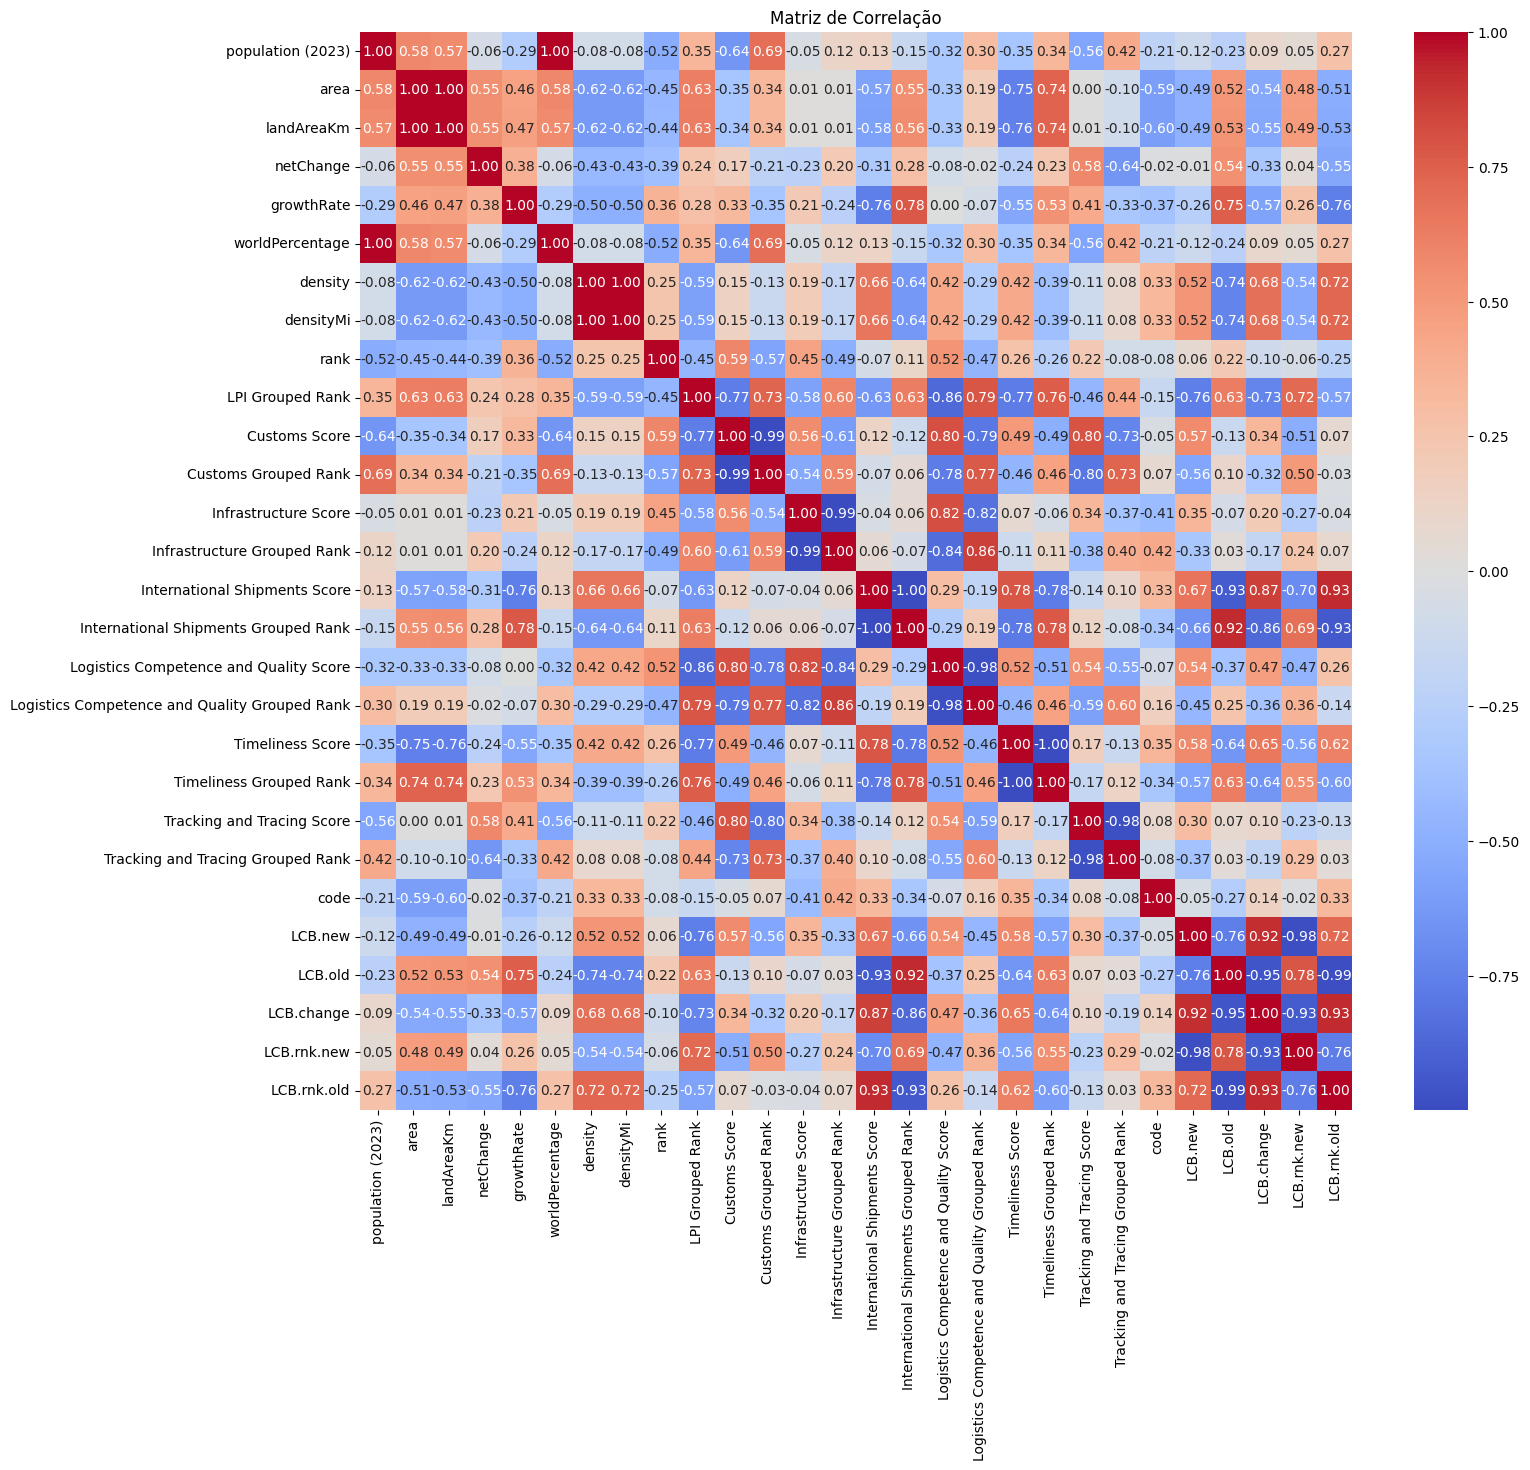

In [218]:

# Calculando a matriz de correlação
correlation_matrix = resultado_left_join_4.corr()

# Exibindo a matriz de correlação
plt.figure(figsize=(16, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação')


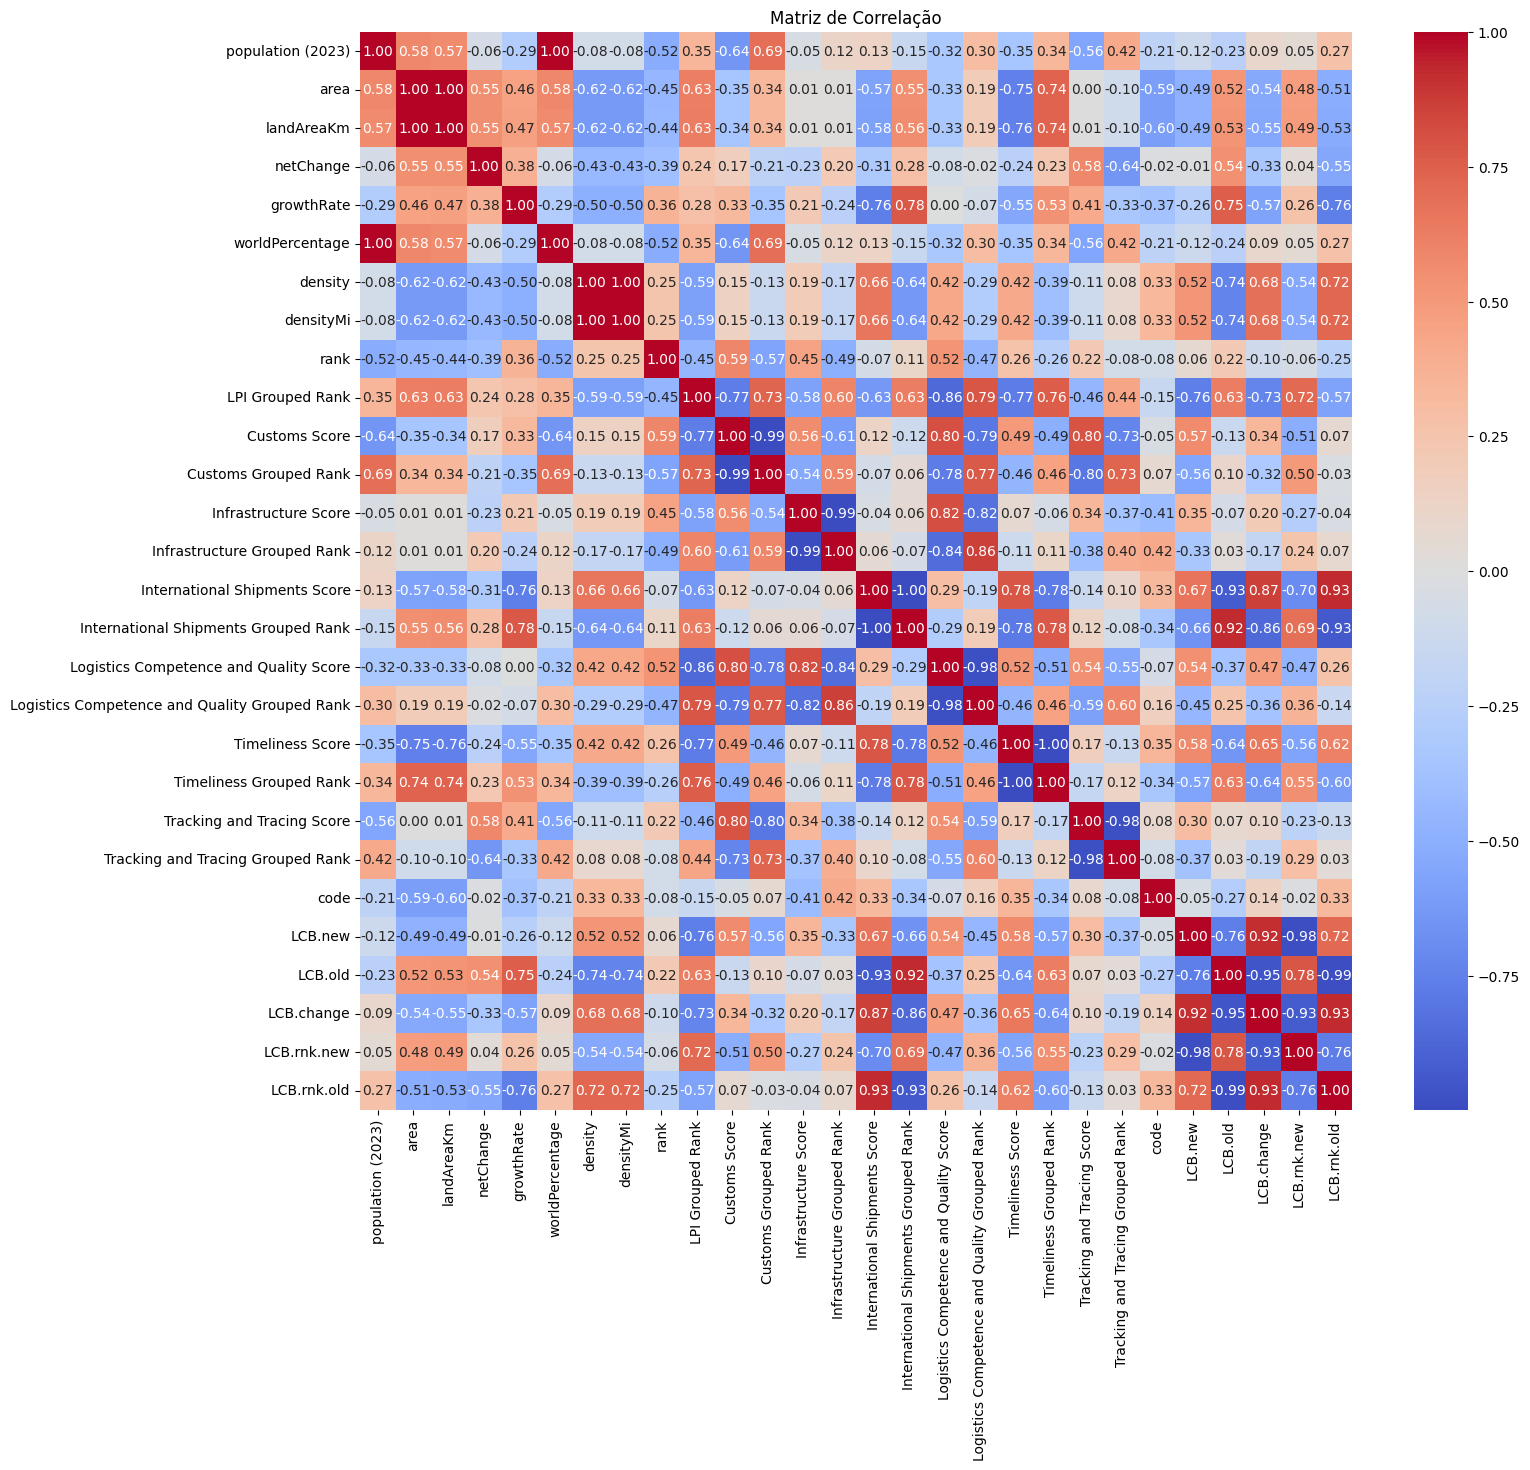

In [224]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculando a matriz de correlação (substitua 'resultado_left_join_4' pelos seus dados)
correlation_matrix = resultado_left_join_4.corr()

# Configurando o tamanho da figura
plt.figure(figsize=(16, 14))

# Criando o heatmap com seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação')

# Salvando o gráfico como imagem PNG
plt.savefig('/Users/victorcasi/Documents/data/matriz_correlacao.png')

# Mostrando o gráfico
plt.show()

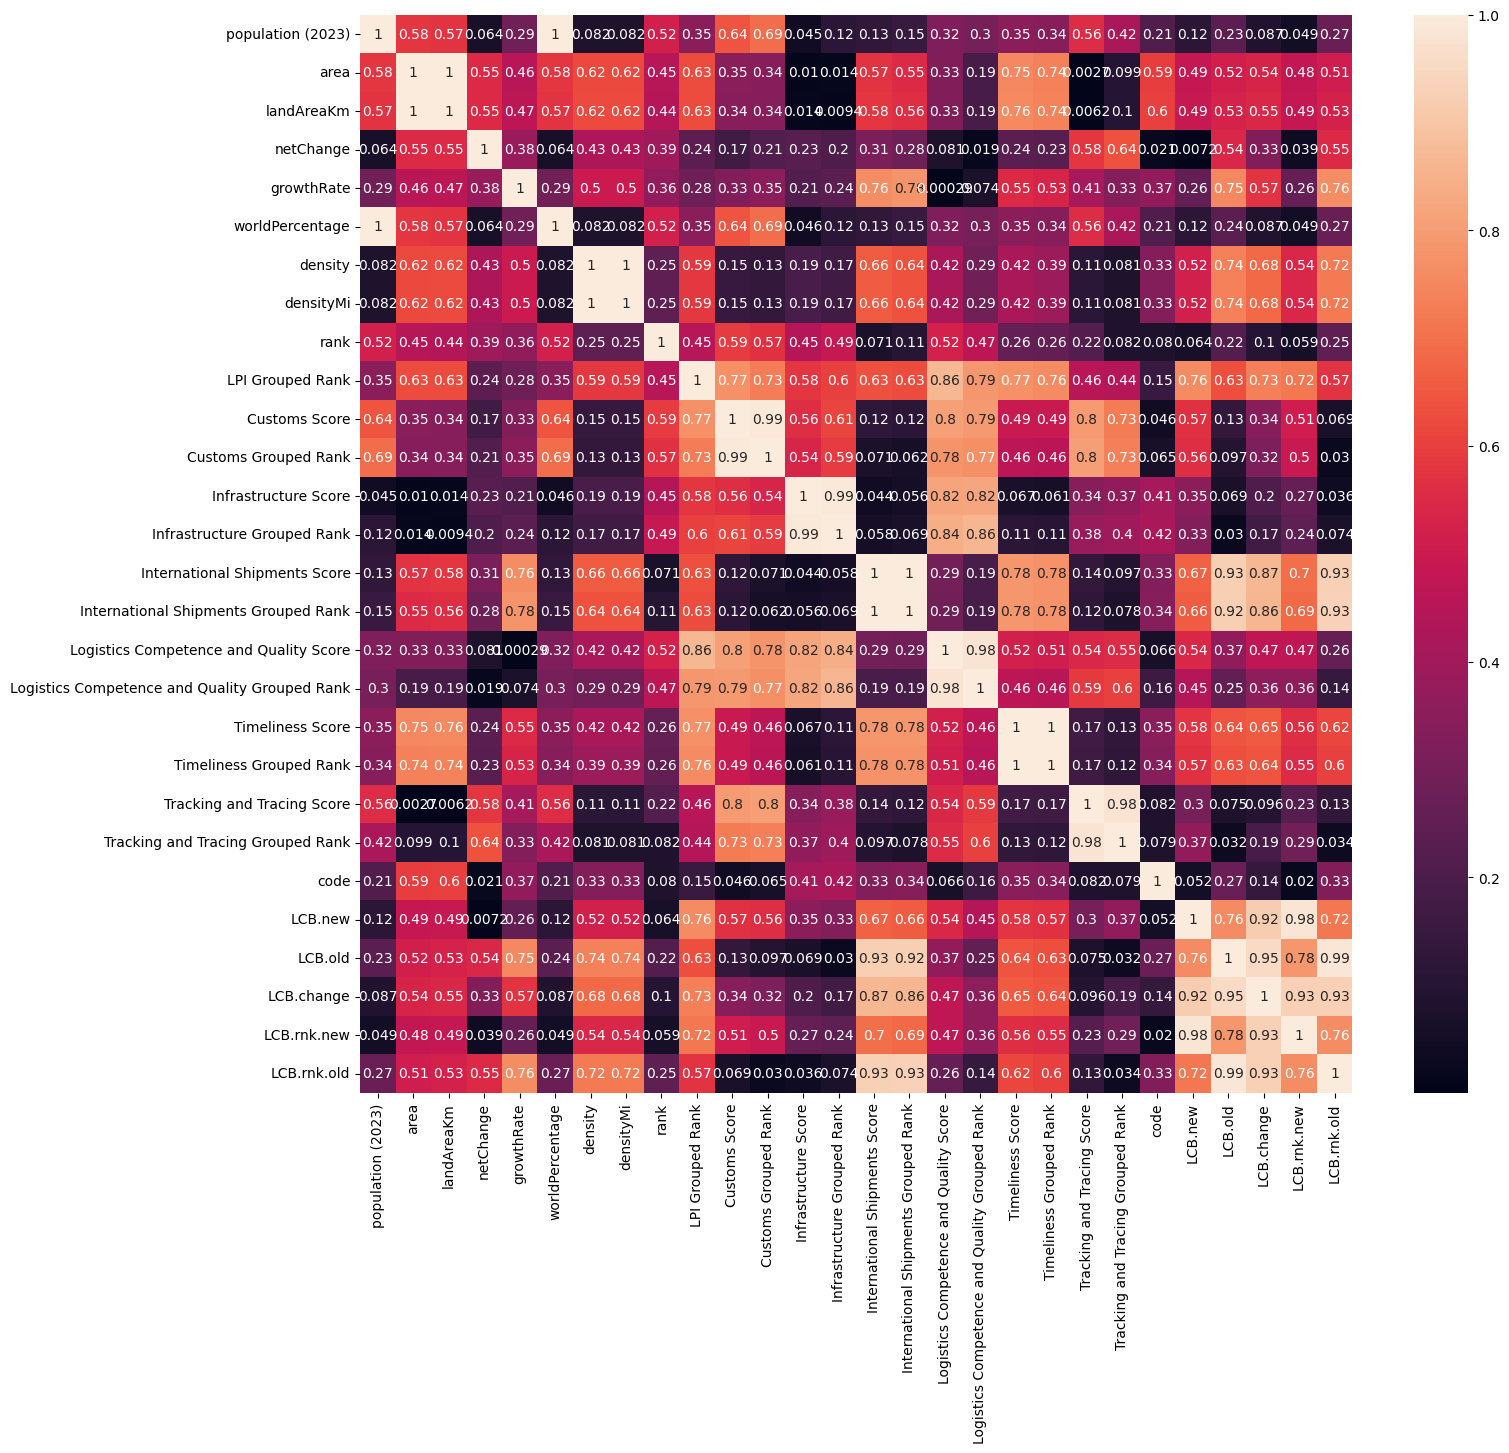

In [226]:
plt.figure(figsize=(16,14))
sns.heatmap(resultado_left_join_4.corr().abs(),annot=True);

In [221]:
plt.savefig('/Users/victorcasi/Documents/data/matriz_correlacao.png')


<Figure size 640x480 with 0 Axes>

In [24]:
from scipy.stats import pearsonr


In [78]:
columns_to_keep = ['Infrastructure Grouped Rank','country' ,'LCB.rnk.new']
resultado_left_join_3 = resultado_left_join_2[columns_to_keep]
resultado_left_join_3


,Infrastructure Grouped Rank,country,LCB.rnk.new
0,1.0,Singapore,152.0
1,5.0,Finland,72.0
2,9.0,Denmark,37.0
3,3.0,Germany,18.0
4,5.0,Netherlands,38.0
...,...,...,...
245,NaN,NaN,NaN
246,NaN,Comoros,152.0
247,NaN,NaN,NaN
248,NaN,Kiribati,NaN


In [99]:
df_sem_nan = resultado_left_join_2.dropna()
df_sem_nan


,Unnamed: 0,ID,Country,population (2023),area,landAreaKm,unMember,netChange,growthRate,worldPercentage,...,Tracking and Tracing Score,Tracking and Tracing Grouped Rank,code,iso,country,LCB.new,LCB.old,LCB.change,LCB.rnk.new,LCB.rnk.old
0,0,0,Singapore,6014723.0,710.0,718.0,True,0.0012,0.0065,0.0008,...,4.4,1.0,702.0,SGP,Singapore,0.0,48.1,-48.1,152.0,81.0
1,1,1,Finland,5545475.0,338424.0,303940.0,True,0.0001,0.0009,0.0007,...,4.2,3.0,246.0,FIN,Finland,49.1,52.7,-3.6,72.0,66.0
2,2,2,Denmark,5910913.0,43094.0,40000.0,True,0.0009,0.0049,0.0007,...,4.3,2.0,208.0,DNK,Denmark,72.0,25.5,46.5,37.0,138.0
3,3,3,Germany,83294633.0,357114.0,349390.0,True,-0.0012,-0.0009,0.0104,...,4.2,3.0,276.0,DEU,Germany,93.4,0.0,93.4,18.0,162.0
4,4,4,Netherlands,17618299.0,41850.0,33670.0,True,0.0017,0.0031,0.0022,...,4.2,3.0,528.0,NLD,Netherlands,70.7,14.4,56.3,38.0,155.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,116,116,Cuba,11194449.0,109884.0,103800.0,True,-0.0006,-0.0016,0.0014,...,2.4,105.0,192.0,CUB,Cuba,17.1,78.6,-61.5,134.0,15.0
117,117,117,Angola,36684202.0,1246700.0,1246700.0,True,0.0352,0.0308,0.0046,...,2.3,117.0,24.0,AGO,Angola,37.9,27.7,10.2,104.0,135.0
118,118,118,Cameroon,28647293.0,475442.0,472710.0,True,0.0235,0.0263,0.0036,...,1.8,137.0,120.0,CMR,Cameroon,4.3,41.6,-37.3,149.0,103.0
119,119,119,Haiti,11724763.0,27750.0,27560.0,True,0.0045,0.0121,0.0015,...,2.1,133.0,332.0,HTI,Haiti,10.2,57.5,-47.3,144.0,48.0


In [126]:
del df_sem_nan['code']
df_sem_nan

,LPI Grouped Rank,Customs Score,Customs Grouped Rank,Infrastructure Score,Infrastructure Grouped Rank,International Shipments Score,International Shipments Grouped Rank,Logistics Competence and Quality Score,Logistics Competence and Quality Grouped Rank,Timeliness Score,Timeliness Grouped Rank,Tracking and Tracing Score,Tracking and Tracing Grouped Rank,LCB.new,LCB.old,LCB.change,LCB.rnk.new,LCB.rnk.old
0,1.0,4.2,1.0,4.6,1.0,4.0,2.0,4.4,1.0,4.3,1.0,4.4,1.0,0.0,48.1,-48.1,152.0,81.0
1,2.0,4.0,4.0,4.2,5.0,4.1,1.0,4.2,3.0,4.3,1.0,4.2,3.0,49.1,52.7,-3.6,72.0,66.0
2,3.0,4.1,2.0,4.1,9.0,3.6,14.0,4.1,9.0,4.1,10.0,4.3,2.0,72.0,25.5,46.5,37.0,138.0
3,3.0,3.9,7.0,4.3,3.0,3.7,8.0,4.2,3.0,4.1,10.0,4.2,3.0,93.4,0.0,93.4,18.0,162.0
4,3.0,3.9,7.0,4.2,5.0,3.7,8.0,4.2,3.0,4.0,17.0,4.2,3.0,70.7,14.4,56.3,38.0,155.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,133.0,2.0,130.0,2.2,118.0,2.1,133.0,2.2,127.0,2.6,117.0,2.4,105.0,17.1,78.6,-61.5,134.0,15.0
117,135.0,1.7,138.0,2.1,126.0,2.4,111.0,2.3,120.0,2.1,139.0,2.3,117.0,37.9,27.7,10.2,104.0,135.0
118,135.0,2.1,120.0,2.1,126.0,2.2,128.0,2.1,134.0,2.1,139.0,1.8,137.0,4.3,41.6,-37.3,149.0,103.0
119,135.0,2.1,120.0,1.8,137.0,2.3,121.0,2.0,136.0,2.5,125.0,2.1,133.0,10.2,57.5,-47.3,144.0,48.0


In [110]:

df_sem_nan.columns

Index(['Unnamed: 0', 'population (2023)', 'area', 'landAreaKm', 'unMember',
       'netChange', 'growthRate', 'worldPercentage', 'density', 'densityMi',
       'rank', 'LPI Grouped Rank', 'Customs Score', 'Customs Grouped Rank',
       'Infrastructure Score', 'Infrastructure Grouped Rank',
       'International Shipments Score', 'International Shipments Grouped Rank',
       'Logistics Competence and Quality Score',
       'Logistics Competence and Quality Grouped Rank', 'Timeliness Score',
       'Timeliness Grouped Rank', 'Tracking and Tracing Score',
       'Tracking and Tracing Grouped Rank', 'code', 'LCB.new', 'LCB.old',
       'LCB.change', 'LCB.rnk.new', 'LCB.rnk.old'],
      dtype='object')

<Figure size 800x600 with 0 Axes>

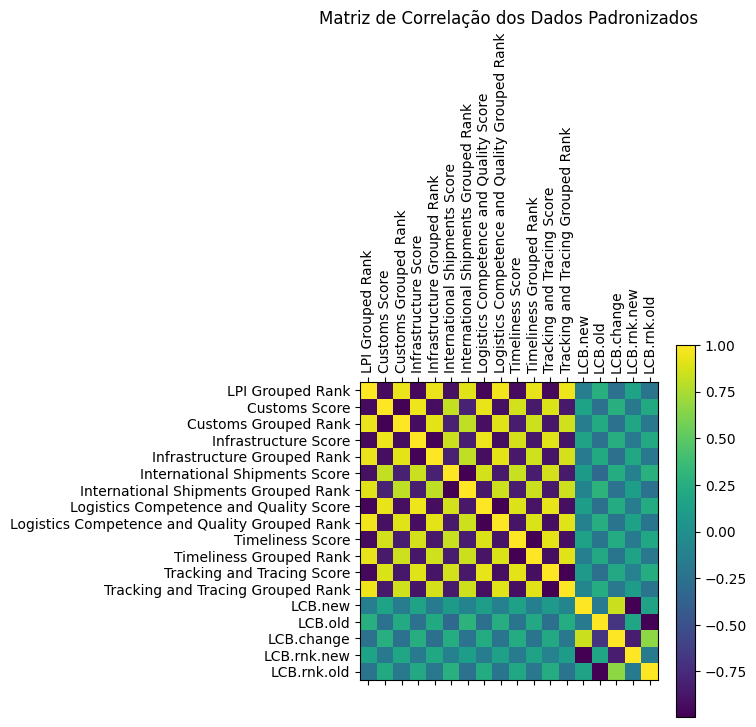

In [148]:
data_padronizado = (df_sem_nan - df_sem_nan.mean()) / df_sem_nan.std()
correlation_matrix = data_padronizado.corr()
import matplotlib.pyplot as plt

# Plotando a matriz de correlação
plt.figure(figsize=(8, 6))
plt.matshow(correlation_matrix, cmap='viridis')
plt.title('Matriz de Correlação dos Dados Padronizados')
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.show()

Text(0.5, 1.0, 'Matriz de Correlação')

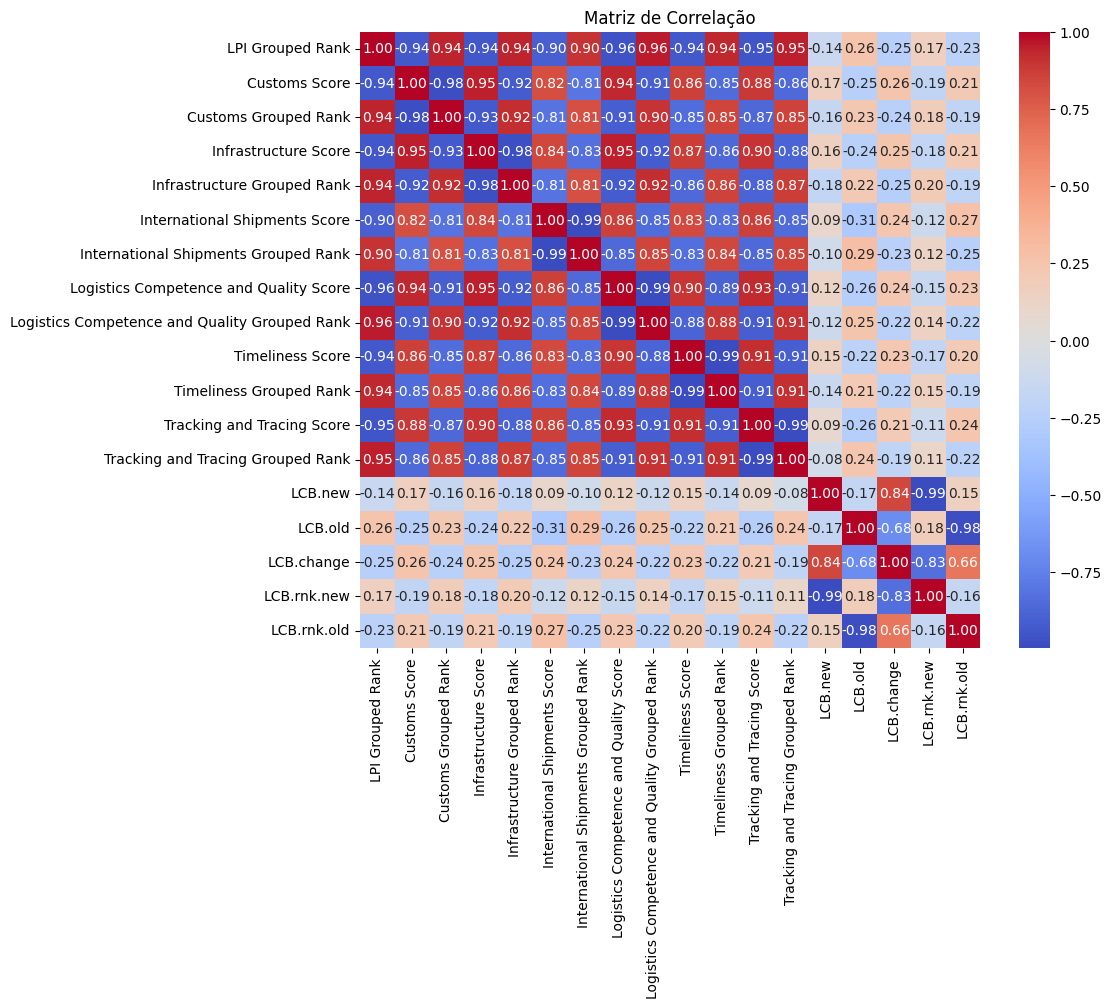

In [167]:
# Calculando a matriz de correlação
correlation_matrix = data_padronizado.corr()

# Exibindo a matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação')



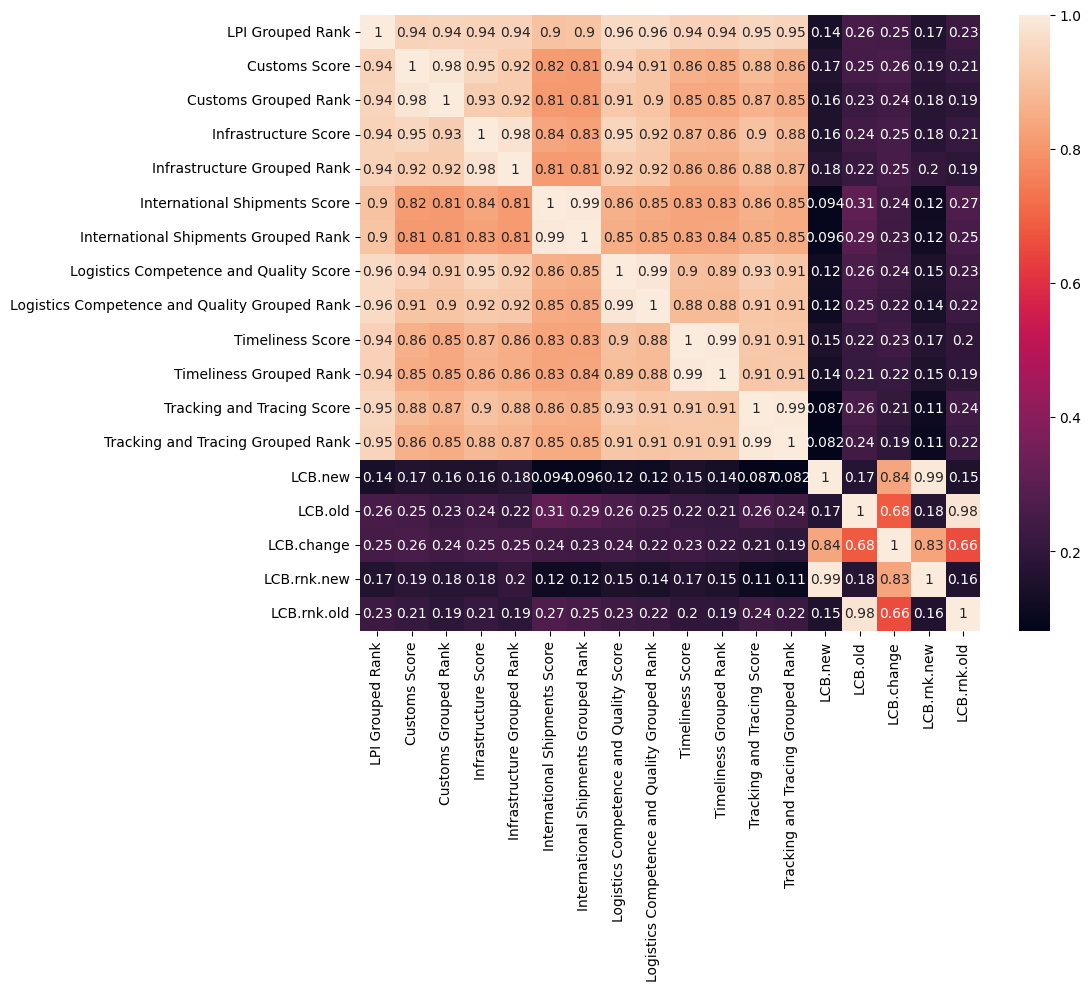

In [131]:


plt.figure(figsize=(10,8))
sns.heatmap(df_sem_nan.corr().abs(),annot=True);

In [80]:
correlation_coef, p_value = pearsonr(df_sem_nan['Infrastructure Grouped Rank'], df_sem_nan['LCB.rnk.new'])

print(f"Coeficiente de correlação de Pearson: {correlation_coef}")
print(f"Valor P: {p_value}")




Coeficiente de correlação de Pearson: 0.20465770758730997
Valor P: 0.029673405638251688


In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

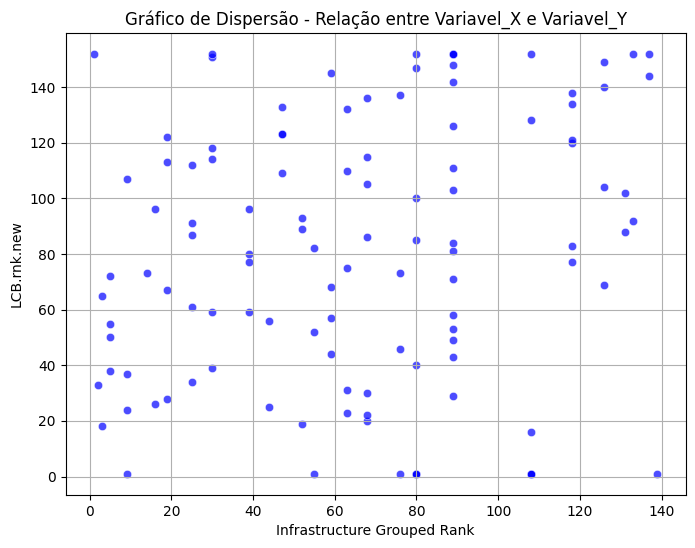

In [84]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Infrastructure Grouped Rank', y='LCB.rnk.new', data=df_sem_nan, color='blue', alpha=0.7)
plt.title('Gráfico de Dispersão - Relação entre Variavel_X e Variavel_Y')
plt.grid(True)
plt.show()